In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [2]:
''' reading dataset '''
df = pd.read_csv('/content/water_potability.csv')

In [3]:
''' displaying first 5 rows '''
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
''' shape of data '''
df.shape

(3276, 10)

In [5]:
''' checking null values '''
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
''' checking info of data '''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
''' unique values in each column '''
for column in df.columns:
    print("{} has {} unique values".format(column, len(df[column].unique())))

ph has 2786 unique values
Hardness has 3276 unique values
Solids has 3276 unique values
Chloramines has 3276 unique values
Sulfate has 2496 unique values
Conductivity has 3276 unique values
Organic_carbon has 3276 unique values
Trihalomethanes has 3115 unique values
Turbidity has 3276 unique values
Potability has 2 unique values


In [8]:
''' describing dataset '''
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


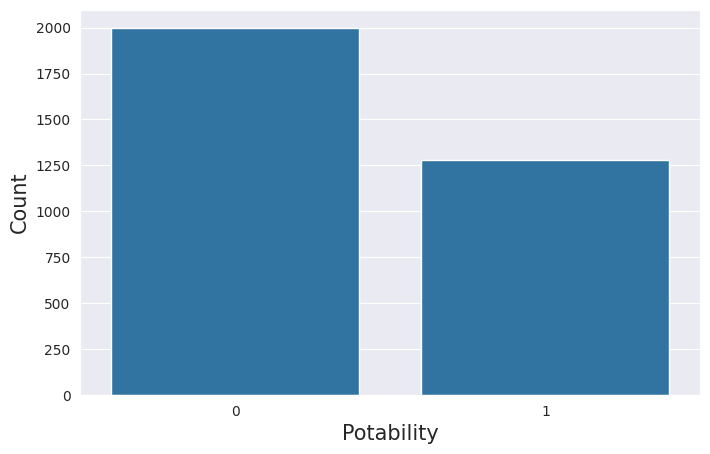

In [9]:
''' value counts of Potability '''
pot_lbl = df['Potability'].value_counts()

''' barplot '''
plt.figure(figsize=(8, 5))
sns.barplot(x=pot_lbl.index, y=pot_lbl)
plt.xlabel('Potability', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

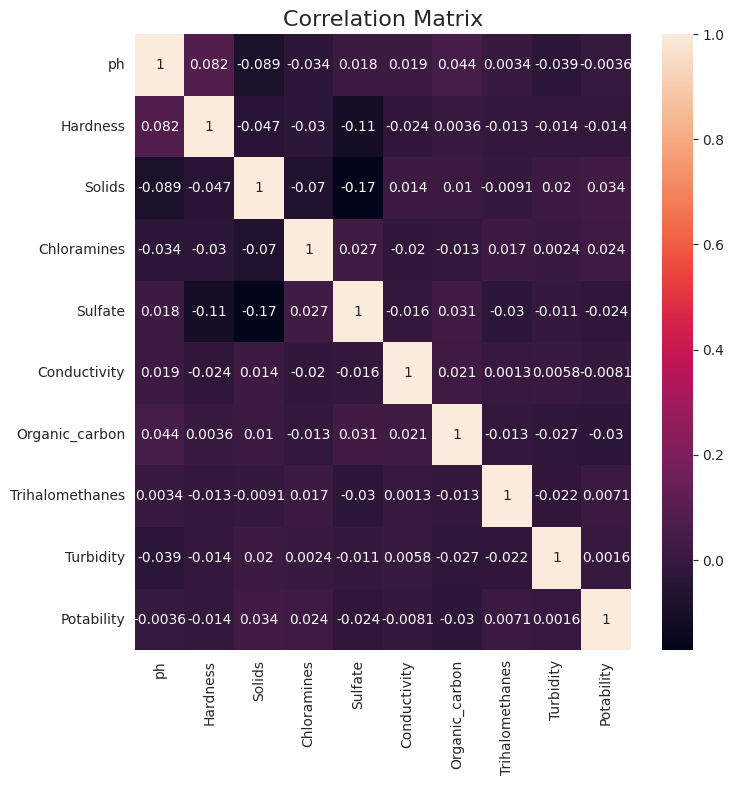

In [10]:
''' correlation matrix '''
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix', fontsize=16);

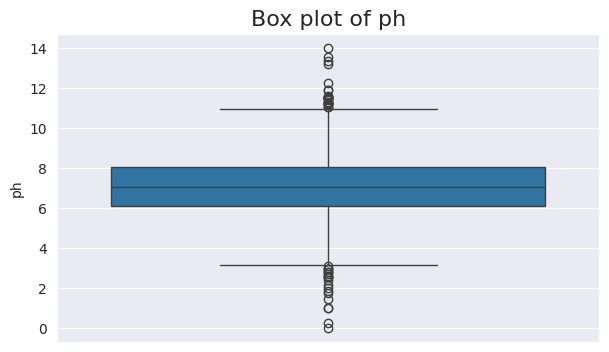

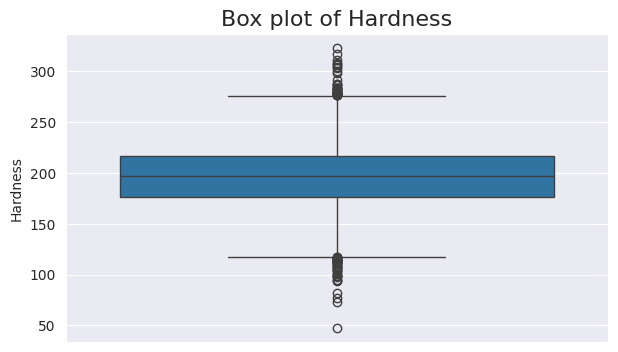

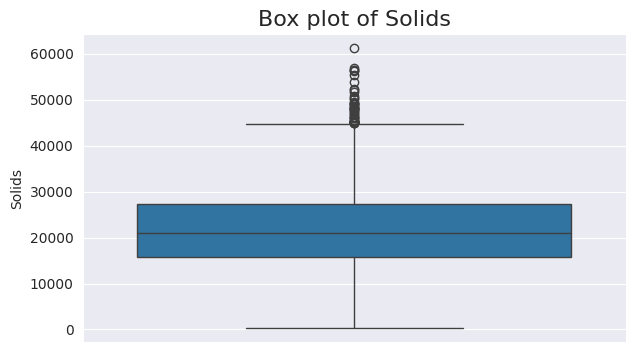

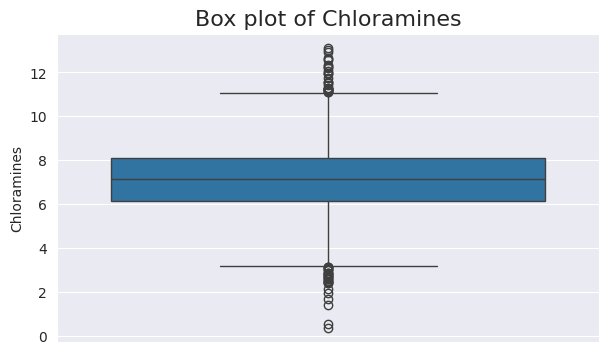

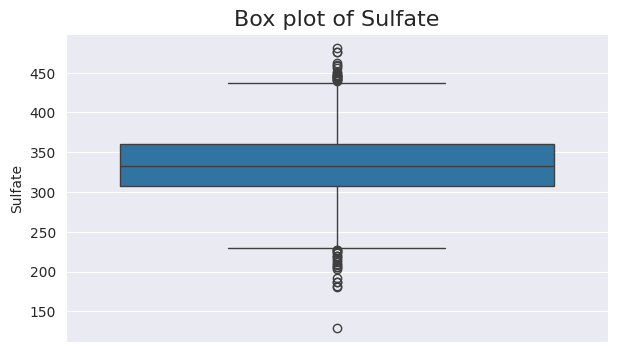

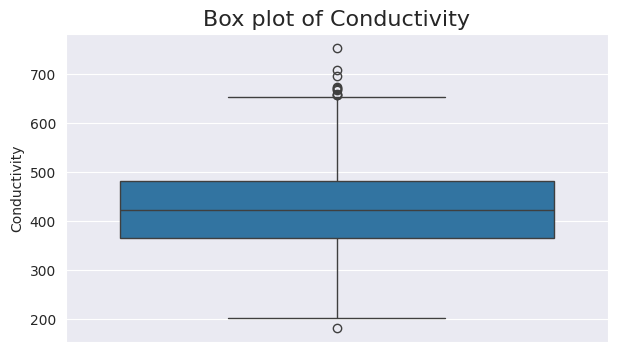

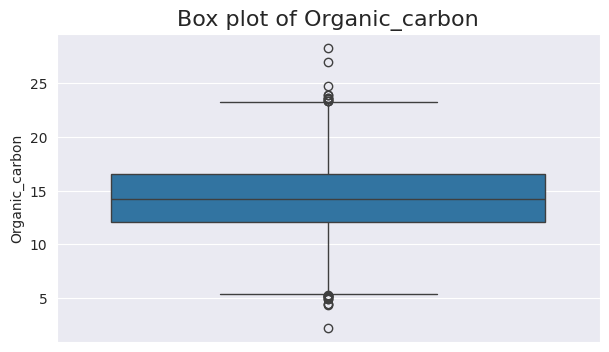

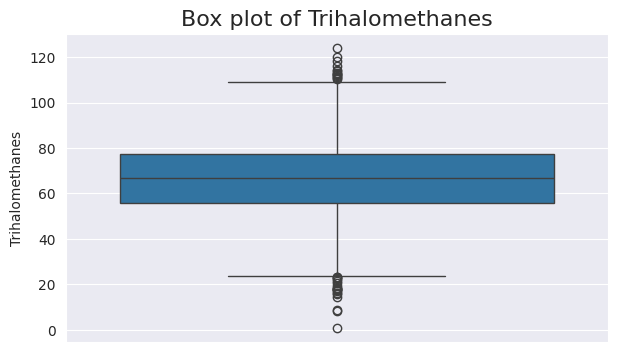

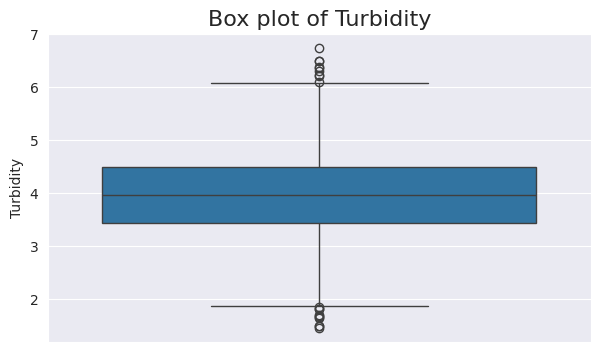

In [11]:
''' box plot '''
for column in df.columns[:-1]:
    plt.figure(figsize=(7, 4))
    sns.boxplot(df[column])
    plt.title('Box plot of {}'.format(column), fontsize=16);

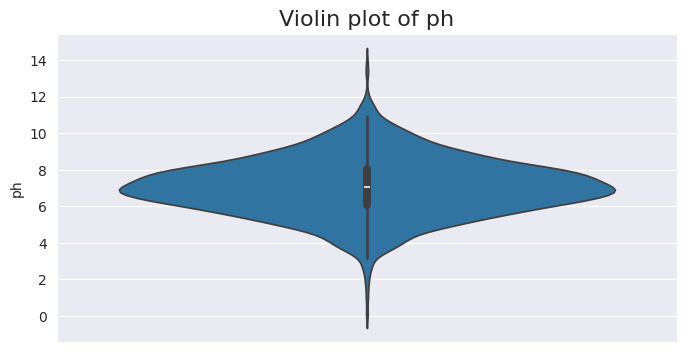

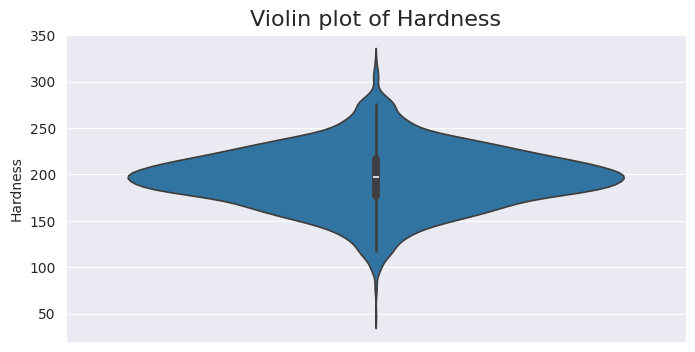

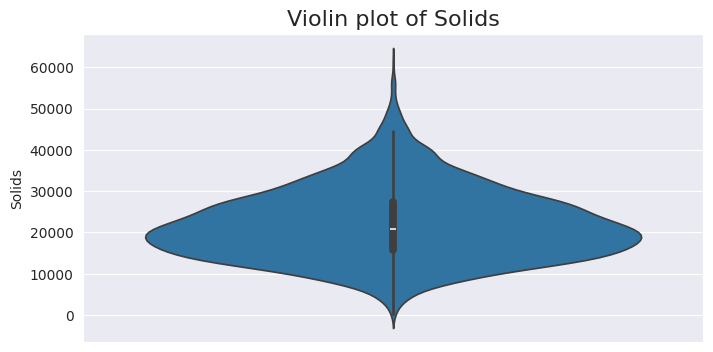

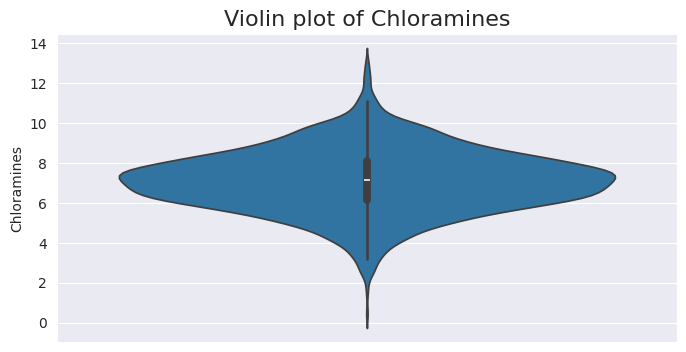

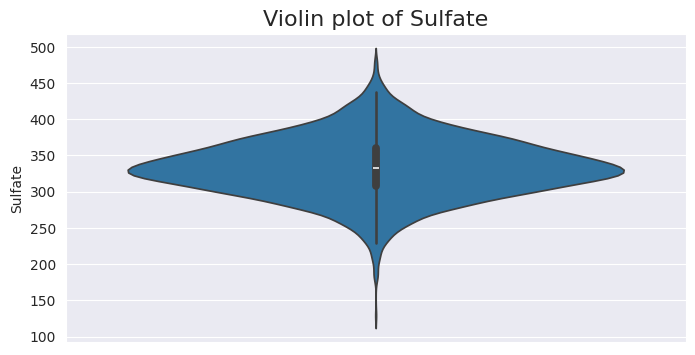

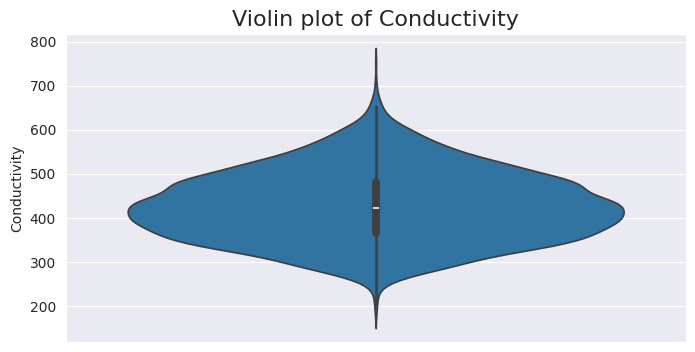

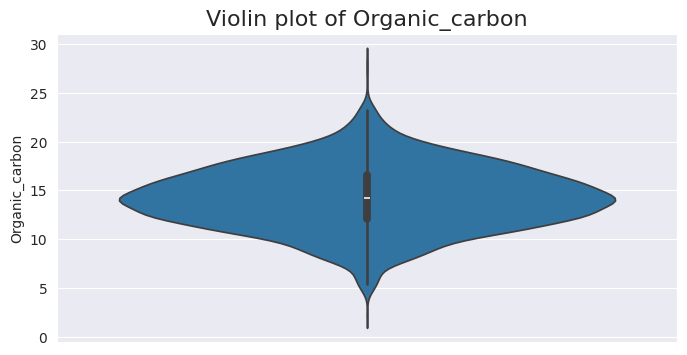

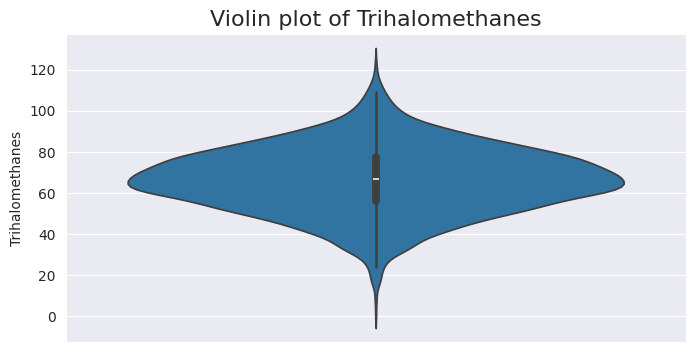

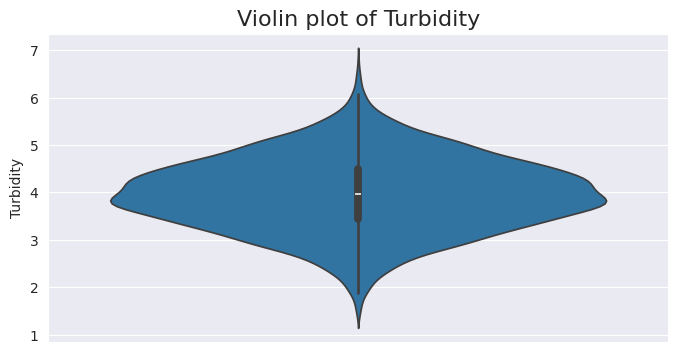

In [12]:
''' violin plot '''
for column in df.columns[:-1]:
    plt.figure(figsize=(8, 4))
    sns.violinplot(df[column])
    plt.title('Violin plot of {}'.format(column), fontsize=16);

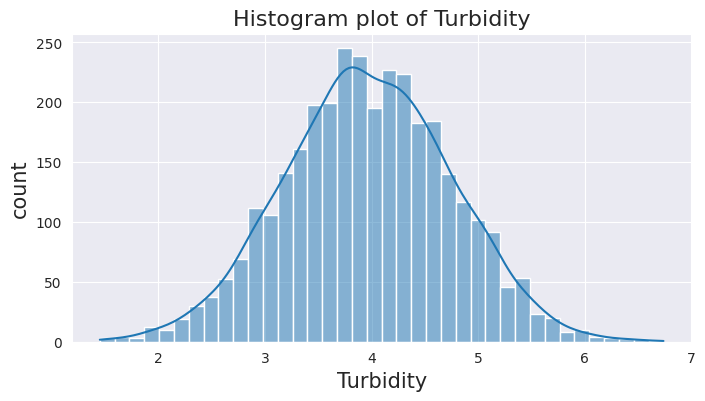

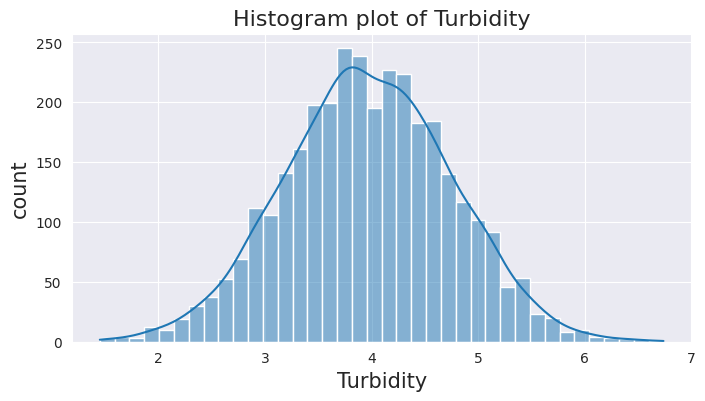

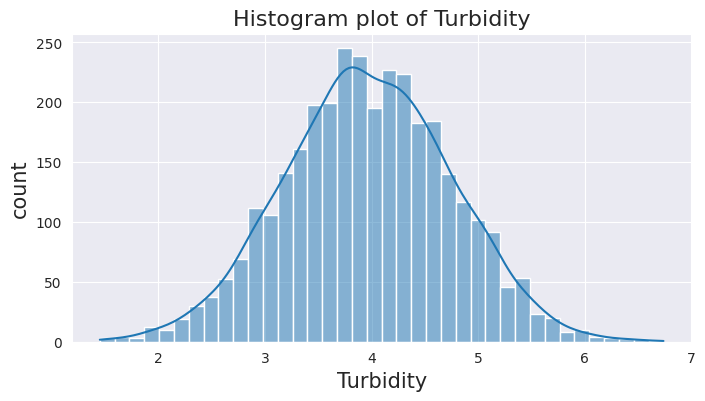

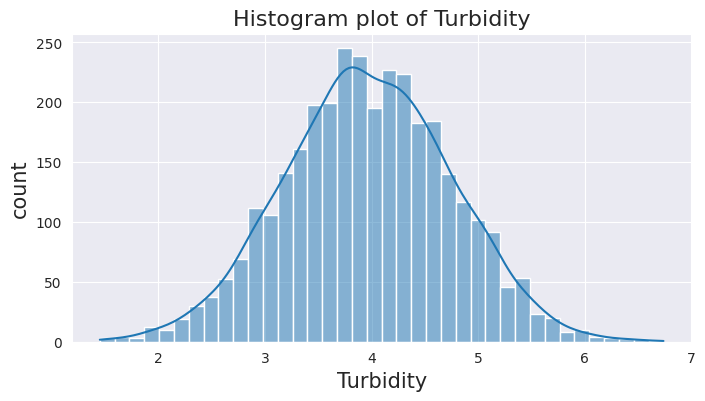

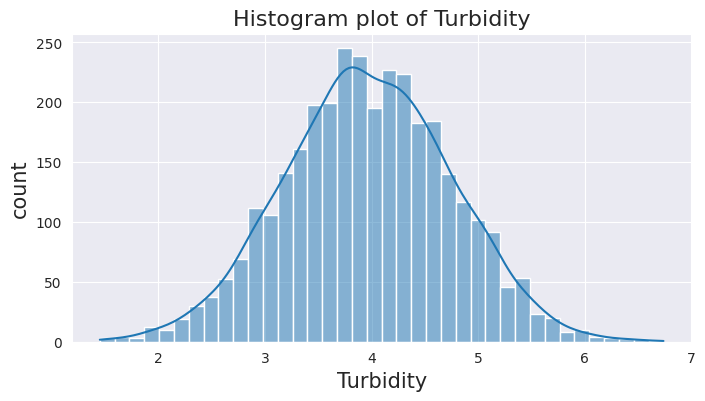

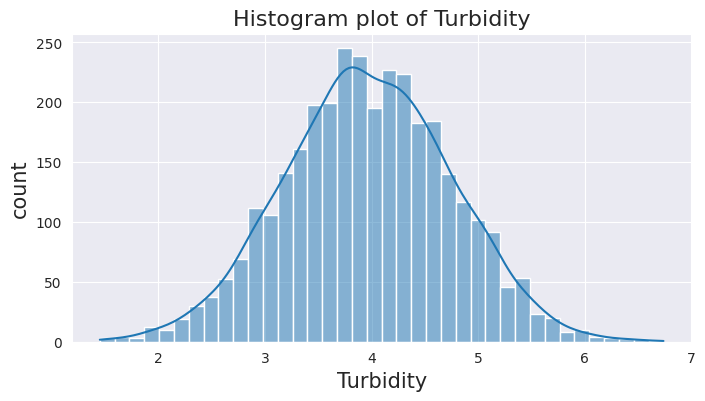

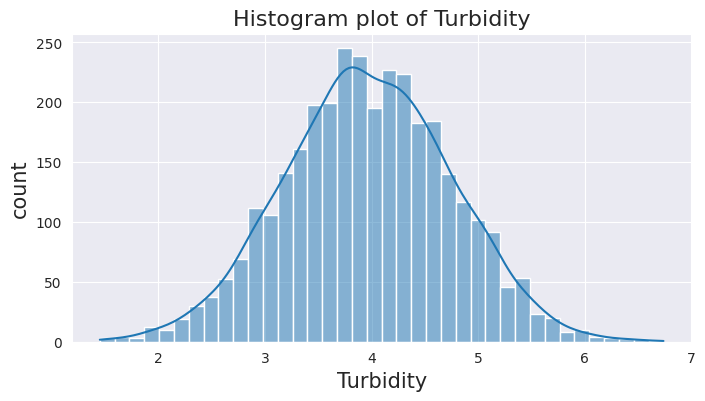

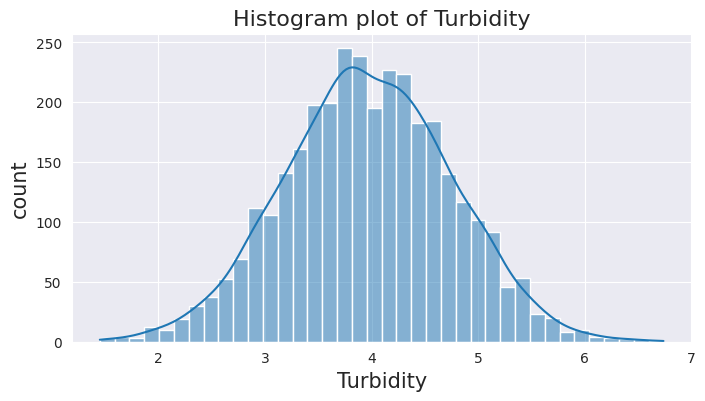

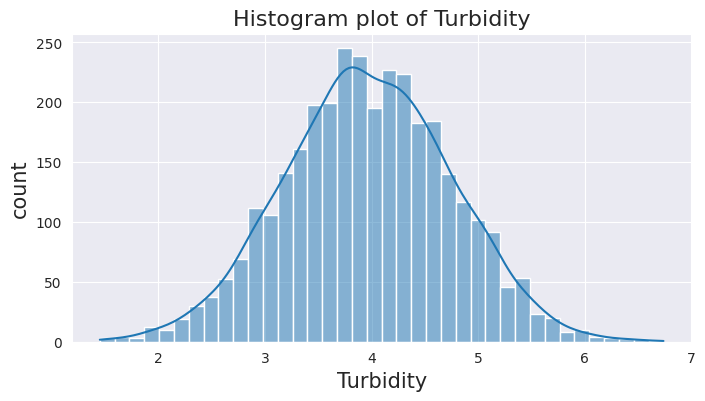

In [13]:
for freature in df.columns[:-1]:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.xlabel(column, fontsize=15)
    plt.ylabel('count', fontsize=15)
    plt.title('Histogram plot of {}'.format(column), fontsize=16);

In [14]:
''' percentage of null values in each column '''

for feature in df.columns:
    print("{} \t {:.1f}% null values".format(feature, (df[feature].isnull().sum() / len(df)) * 100 ))

ph 	 15.0% null values
Hardness 	 0.0% null values
Solids 	 0.0% null values
Chloramines 	 0.0% null values
Sulfate 	 23.8% null values
Conductivity 	 0.0% null values
Organic_carbon 	 0.0% null values
Trihalomethanes 	 4.9% null values
Turbidity 	 0.0% null values
Potability 	 0.0% null values


In [15]:
''' preparing data for model '''

ph_median = df[df['Potability'] == 0]['ph'].median(skipna=True)
df.loc[(df['Potability'] == 0) & (df['ph'].isna()), 'ph'] = ph_median

ph_median_1 = df[df['Potability'] == 1]['ph'].median(skipna=True)
df.loc[(df['Potability'] == 1) & (df['ph'].isna()), 'ph'] = ph_median_1

sulf_median = df[df['Potability'] == 0]['Sulfate'].median(skipna=True)
df.loc[(df['Potability'] == 0) & (df['Sulfate'].isna()), 'Sulfate'] = sulf_median

sulf_median_1 = df[df['Potability'] == 1]['Sulfate'].median(skipna=True)
df.loc[(df['Potability'] == 1) & (df['Sulfate'].isna()), 'Sulfate'] = sulf_median_1

traih_median = df[df['Potability'] == 0]['Trihalomethanes'].median(skipna=True)
df.loc[(df['Potability'] == 0) & (df['Trihalomethanes'].isna()), 'Trihalomethanes'] = traih_median

trah_median_1 = df[df['Potability'] == 1]['Trihalomethanes'].median(skipna=True)
df.loc[(df['Potability'] == 1) & (df['Trihalomethanes'].isna()), 'Trihalomethanes'] = trah_median_1

In [16]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.035456,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.389426,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.389426,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [17]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [18]:
# independent and dependent features
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [19]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (2620, 9)
X_test shape:  (656, 9)


In [21]:
''' standard scaler '''
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
from sklearn.model_selection import KFold
n_splits = 10  # Number of splits for K-Fold cross-validation
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)


In [26]:
models_acc = []

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


#Defining Metrics
def calculate_performance_metrics(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    TP = conf_matrix[1, 1]
    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]

    TPR = TP / (TP + FN)  # True Positive Rate or Sensitivity
    SPC = TN / (TN + FP)  # Specificity
    PPV = TP / (TP + FP)  # Positive Predictive Value or Precision
    NPV = TN / (TN + FN)  # Negative Predictive Value
    FPR = FP / (FP + TN)  # False Positive Rate
    FDR = FP / (FP + TP)  # False Discovery Rate
    FNR = FN / (FN + TP)  # False Negative Rate
    ACC = (TP + TN) / (TP + TN + FP + FN)  # Accuracy
    F1 = 2 * (TP) / (2*(TP) + FP + FN)  # F1 Score
    BACC = (TPR + SPC) / 2  # Balanced Accuracy
    TSS = TPR - FPR  # True Skill Statistics
    HSS = (2 * (TP * TN - FP * FN)) / ((TP + FN) * (FN + TN) + (TP + FP) * (FP + TN))  # Heidke Skill Score
    BS = (FP + FN) / (TP + TN + FP + FN)  # Brier Score
    BSS = (TPR - (FP / (FP + TN))) - ((TP + FN) / (TP + FN + TN + FP))  # Brier Skill Score

    return {
        'TPR': TPR,
        'SPC': SPC,
        'PPV': PPV,
        'NPV': NPV,
        'FPR': FPR,
        'FDR': FDR,
        'FNR': FNR,
        'ACC': ACC,
        'F1': F1,
        'BACC': BACC,
        'TSS': TSS,
        'HSS': HSS,
        'BS': BS,
        'BSS': BSS
    }

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize models
models = [
    KNeighborsClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    Sequential([
        Bidirectional(LSTM(units=64), input_shape=(1, X_train.shape[1])),
        Dense(2, activation='softmax')
    ])
]

# Define a function to calculate performance metrics
def calculate_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        **calculate_performance_metrics(y_true, y_pred)  # Assuming calculate_performance_metrics is defined
    }

# Initialize an empty list to store metrics dataframes for each model
models_dfs = []

# Iterate over each model
for model in models:
    # Initialize an empty list to store metrics dictionaries for each iteration
    model_metrics = []

    # Iterate over each fold
    for i, (train_index, test_index) in enumerate(kf.split(X), start=1):
        # Split the data
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        if isinstance(model, Sequential):  # If the model is an LSTM model
            # Prepare data for LSTM
            X_train_lstm = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
            X_test_lstm = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

            # Convert labels to categorical
            y_train_categorical = to_categorical(y_train)
            y_test_categorical = to_categorical(y_test)

            # Compile and fit the LSTM model
            model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
            model.fit(X_train_lstm, y_train_categorical, epochs=10, batch_size=32, verbose=0)

            # Predict on test data
            pred_prob = model.predict(X_test_lstm)
            pred = np.argmax(pred_prob, axis=1)

        else:  # For other models
            # Fit the model on training data
            model.fit(X_train, y_train)

            # Predict on test data
            pred = model.predict(X_test)

        # Calculate performance metrics
        metrics = calculate_metrics(y_test, pred)

        # Append metrics to the list
        model_metrics.append(metrics)

    # Convert the list of metrics dictionaries to a DataFrame
    model_metrics_df = pd.DataFrame(model_metrics)

    # Append the DataFrame to the list
    models_dfs.append(model_metrics_df)

# Print the metrics for each model
for model_name, model_metrics_df in zip(["KNeighborsClassifier", "RandomForestClassifier", "GaussianNB", "Bidirectional LSTM"], models_dfs):
    print(f'{model_name} Metrics:')
    print(model_metrics_df)
    print()


11/11 [==============================] - 2s 13ms/step
KNeighborsClassifier Metrics:
   Accuracy       TPR       SPC       PPV       NPV       FPR       FDR  \
0  0.539634  0.282258  0.696078  0.360825  0.614719  0.303922  0.639175   
1  0.524390  0.200000  0.711538  0.285714  0.606557  0.288462  0.714286   
2  0.603659  0.360656  0.747573  0.458333  0.663793  0.252427  0.541667   
3  0.554878  0.289062  0.725000  0.402174  0.614407  0.275000  0.597826   
4  0.591463  0.328358  0.773196  0.500000  0.625000  0.226804  0.500000   
5  0.557927  0.240602  0.774359  0.421053  0.599206  0.225641  0.578947   
6  0.535168  0.286822  0.696970  0.381443  0.600000  0.303030  0.618557   
7  0.602446  0.366667  0.739130  0.448980  0.668122  0.260870  0.551020   
8  0.541284  0.270677  0.726804  0.404494  0.592437  0.273196  0.595506   
9  0.513761  0.237037  0.708333  0.363636  0.569038  0.291667  0.636364   

        FNR       ACC        F1      BACC       TSS       HSS        BS  \
0  0.717742  0.